# **Bike Sharing Case Study Assignment**
by:
**Rahul Batra**

# 1. Objective and Summary of Approach  

**Objective:**
Objective of the project is to develop a linear regression model to predict the demand of shared bikes based on the various variables provided. Also, highlight which variables are having a significant impact in predicting the demand. Lastly, quantity how well these variables describe the bike demands.

**Summary of Approach:**
The steps towards developing a linear regression model would be:
1.	Exploratory Data Analysis (EDA)

  *   Visual Univariate and Bivariate Analysis
  *   Defining New Variables to as per the EDA and outlier removal
  *   Correlation of different Variables
  *   Getting a list of important fields via Visual EDA and Correlation Analysis
  
2.  Linear Regression


  *   Split data into train and test
  *   RFE (Recursive Feature Elimination) to find the important variables
  *   Confirm if the variables are in line with the important EDA variables
  *   Model Creation and interation
        *   Create first model and check the high p-values, F-statistics, VIF.
        *   Remove one by one, high p-value and / or high VIF variables and create the model again (repeat this steps, till we have low p-values < 0.05 and low VIF < 5 for all remaining variables)
        *   Confirm the final model
  *   Residual Analysis of the train data
  *   Running on test data and making predictions
  *   Model Evaluation



# 2. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import math

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 3. Load & Preview the data


In [ ]:
# read the loan.csv nd and preview the header
bike = pd.read_csv('/content/day.csv')
print(bike.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
# print Original Shape of Bike Data
print('Original Shape of Bike DF is', bike.shape)

Original Shape of Bike DF is (730, 16)


In [ ]:
# Getting the details of the original Loan DF and the fields
bike.info()
# <<<< INFERENCE >>>>
# there are no null cells.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# getting the range of variables
bike.describe()

# note that 1 of the value of cnt is 22, which appears to be an outlier.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Check unique values for each variable
for col in bike.columns:
  print(f'{col}: {bike[col].nunique()} unique values')
  if len(bike[col].unique()) < 15:
    print(f'{col}: {bike[col].unique()}')


instant: 730 unique values
dteday: 730 unique values
season: 4 unique values
season: [1 2 3 4]
yr: 2 unique values
yr: [0 1]
mnth: 12 unique values
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: 2 unique values
holiday: [0 1]
weekday: 7 unique values
weekday: [6 0 1 2 3 4 5]
workingday: 2 unique values
workingday: [0 1]
weathersit: 3 unique values
weathersit: [2 1 3]
temp: 498 unique values
atemp: 689 unique values
hum: 594 unique values
windspeed: 649 unique values
casual: 605 unique values
registered: 678 unique values
cnt: 695 unique values


# 4. Cleaning the data

## 4.1. Cleaning: Type as Date and Addressing Categolical Variables

In [ ]:
# dropping casual and registered as they are not to be considered
bike = bike.drop(['casual', 'registered'], axis=1)


In [ ]:
# change dteday to date for extracting day of month also.
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')


In [ ]:
# change season with 1:spring, 2:summer, 3:fall, 4:winter
season_dict = {1:'1spring', 2:'2summer', 3:'3fall', 4:'4winter'}
bike['season'] = bike['season'].map(season_dict)

In [ ]:
# change weathersit with 1:Clear, 2:Mist, 3:Light_Rain, 4:Heavy_Rain
weathersit_dict = {1:'1Clear', 2:'2Mist', 3:'3Light_Rain', 4:'4Heavy_Rain'}
bike['weathersit'] = bike['weathersit'].map(weathersit_dict)

In [ ]:
# change season categorical variable to dummy varibles
# Season 1 = Yes - season_2 = 0, season_3 = 0, season_4 = 0 (Spring)
# Season 2 = Yes - season_2 = 1, season_3 = 0, season_4 = 0 (summer)
# Season 3 = Yes - season_2 = 0, season_3 = 1, season_4 = 0 (Fall)
# Season 4 = Yes - season_2 = 0, season_3 = 0, season_4 = 1 (Winter)

season_dummies = pd.get_dummies(bike['season'], prefix='season',  dtype = 'int', drop_first=True)
bike = pd.concat([bike, season_dummies], axis=1)

In [ ]:
# change weathersit categorical variable to dummy varibles
# weathersit  1 = Yes - weathersit_2 = 0, weathersit_3 = 0 (Clear)
# weathersit  2 = Yes - weathersit_2 = 1, weathersit_3 = 0 (Mist)
# weathersit  3 = Yes - weathersit_2 = 0, weathersit_3 = 1 (Light Rain)
# weathersit  4 - it is not there in data (Heavy Rain)
weathersit_dummies = pd.get_dummies(bike['weathersit'], prefix='weathersit',  dtype = 'int', drop_first=True)
bike = pd.concat([bike, weathersit_dummies], axis=1)

In [ ]:
# adding day of the month also to list of fields
bike['day_of_month'] = bike['dteday'].dt.day

## 4.2 Cleaning: Creating Derived Variables

In [ ]:
# create bins for humidity (hum)
number_of_bin = 10
min_hum = bike['hum'].min()
rounded_min_hum = math.floor(min_hum / 10) *10


max_hum = bike['hum'].max()
rounded_max_hum = math.ceil(max_hum / 10) * 10

if min_hum == 0:
  dist = (rounded_max_hum - rounded_min_hum)/number_of_bin
  rounded_min_hum = dist * -1
  bins = np.linspace(rounded_min_hum, rounded_max_hum, number_of_bin+2)
else:
  bins = np.linspace(rounded_min_hum, rounded_max_hum, number_of_bin+1)


bike['hum_bin'] = pd.cut(bike['hum'], bins)

In [ ]:
# create bins for temp
number_of_bin = 10
min_temp = bike['temp'].min()
rounded_min_temp = math.floor(min_temp / 10) *10

max_temp = bike['temp'].max()
rounded_max_temp = math.ceil(max_temp / 10) * 10
bins = np.linspace(rounded_min_temp, rounded_max_temp, number_of_bin+1)

bike['temp_bin'] = pd.cut(bike['temp'], bins)

In [ ]:
# create bins for windspeed
number_of_bin = 10
min_windspeed = bike['windspeed'].min()
rounded_min_windspeed = math.floor(min_windspeed / 10) *10

max_windspeed = bike['windspeed'].max()
rounded_max_windspeed = math.ceil(max_windspeed / 10) * 10
bins = np.linspace(rounded_min_windspeed, rounded_max_windspeed, number_of_bin+1)

bike['windspeed_bin'] = pd.cut(bike['windspeed'], bins)

In [ ]:
# create derived variables for bike bike count
#  a. temp x wind - for wind chill
#  b. temp x humidity

bike['tempxwind'] = bike['temp'] * bike['windspeed']
bike['tempxhum'] = bike['temp'] * bike['hum']


In [ ]:
# getting a view od data after these variables
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2summer,season_3fall,season_4winter,weathersit_2Mist,weathersit_3Light_Rain,day_of_month,hum_bin,temp_bin,windspeed_bin,tempxwind,tempxhum
0,1,2018-01-01,1spring,0,1,0,6,0,2Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,1,"(80.0, 90.0]","(12.0, 16.0]","(8.0, 12.0]",151.689940,1137.098617
1,2,2018-01-02,1spring,0,1,0,0,0,2Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,2,"(60.0, 70.0]","(12.0, 16.0]","(16.0, 20.0]",248.159746,1037.350473
2,3,2018-01-03,1spring,0,1,0,1,1,1Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,3,"(40.0, 50.0]","(8.0, 12.0]","(16.0, 20.0]",133.940831,352.045169
3,4,2018-01-04,1spring,0,1,0,2,1,1Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,4,"(50.0, 60.0]","(8.0, 12.0]","(8.0, 12.0]",88.066622,484.156700
4,5,2018-01-05,1spring,0,1,0,3,1,1Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,5,"(40.0, 50.0]","(8.0, 12.0]","(12.0, 16.0]",116.522969,406.598844


# 5. Exploratory Data Analysis

### 5.1 Numerical Variables

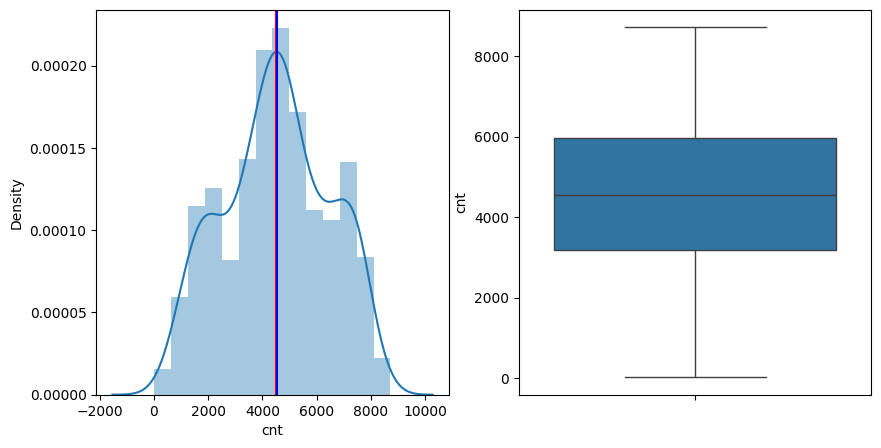

In [ ]:
# create distplot and boxplot for cnt for get an understanding of the spread of
# data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(bike['cnt'], kde=True)
plt.axvline(bike['cnt'].mean(), color="r")
plt.axvline(bike['cnt'].median(), color="b")

plt.subplot(1,2,2)
sns.boxplot(y=(bike['cnt']))
plt.show()

In [ ]:
# list of columns with numercial variables
# dropped casual and registered (as cnt total bike count is directly derived
# from them)
# registered and casual are not considered. these are dropped in section 6.1
list_num = ['temp', 'atemp', 'hum', 'windspeed', 'tempxwind', 'tempxhum', 'cnt']

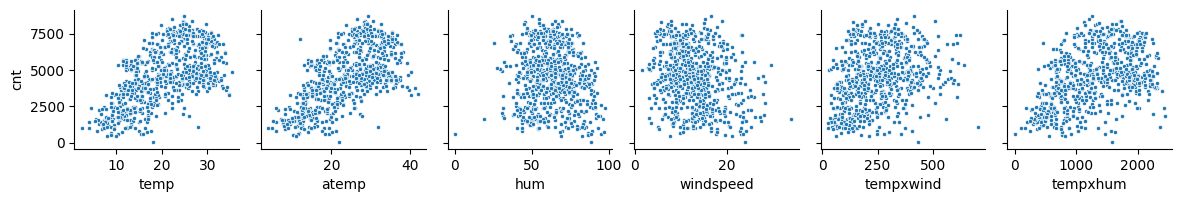

In [ ]:
# create a pairplot for these numercial variables
# <<<< INFERENCE >>>>
# A. We can see a strong co-relation with temp, atemp, tempxwind and tempxhum
# B. While a co-relation with hum, windspeed is not clearly visible.
# C. since cnt is directly derived from registed and casual, this direct
# dependency can be ignored

sns.pairplot(bike[list_num],
             height = 2,
             x_vars=list_num[:len(list_num)-1],
             y_vars=['cnt'],
             plot_kws=dict(marker="."))
plt.show()

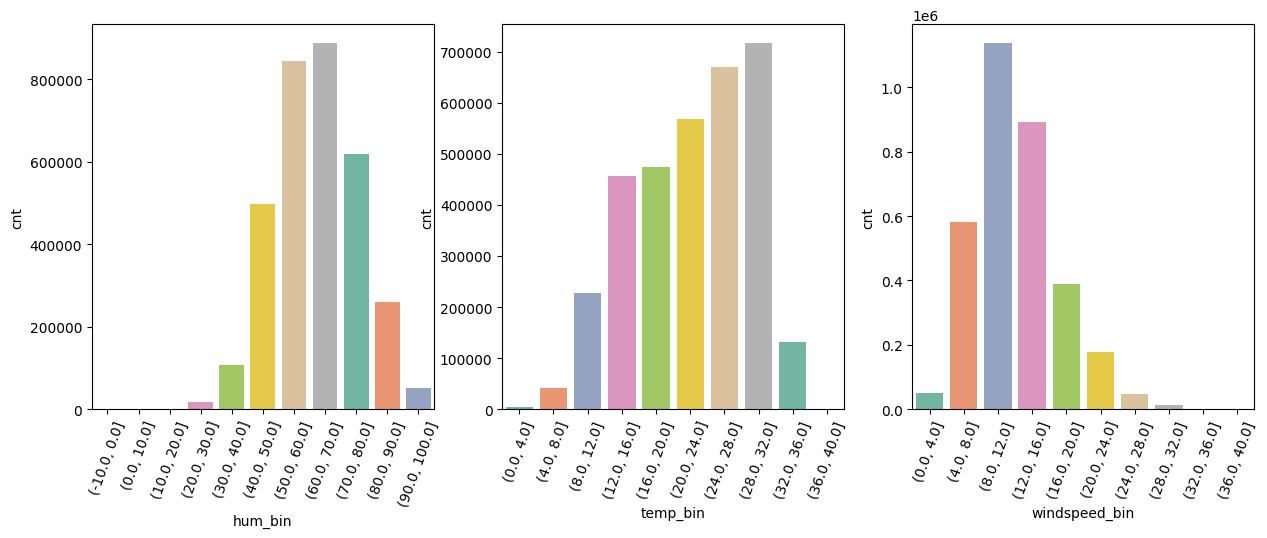

In [ ]:
# list the columns with bins and then group by these columns with cnt
# create a barplot fopr this data
# <<<< INFERENCE >>>>
# A. when the humidity is very low or very high, the bike count drop
# B. when temperature is between 8 and 32, bike count are high
# C. when windspeed is between 4 and 24, bike count are high

list_bin = ['hum_bin', 'temp_bin', 'windspeed_bin']
int = 0


plot_colmn = len(list_bin)
plot_rows = 1

plt.figure(figsize=(plot_colmn*5, plot_rows*5))


for i in list_bin:
  int += 1
  plt.subplot(plot_rows,plot_colmn,int)
  tmp_df = bike.groupby(i)['cnt'].sum().reset_index()
  sns.barplot(y='cnt', x=i, data=tmp_df, palette= 'Set2')
  plt.xticks(rotation=70)

plt.show()


### 5.2.A Analysis of Categorical Variables

In [ ]:
# get the list of categorical variables
# season	yr	mnth	holiday	weekday	workingday	weathersit
list_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
            'weathersit', 'day_of_month']

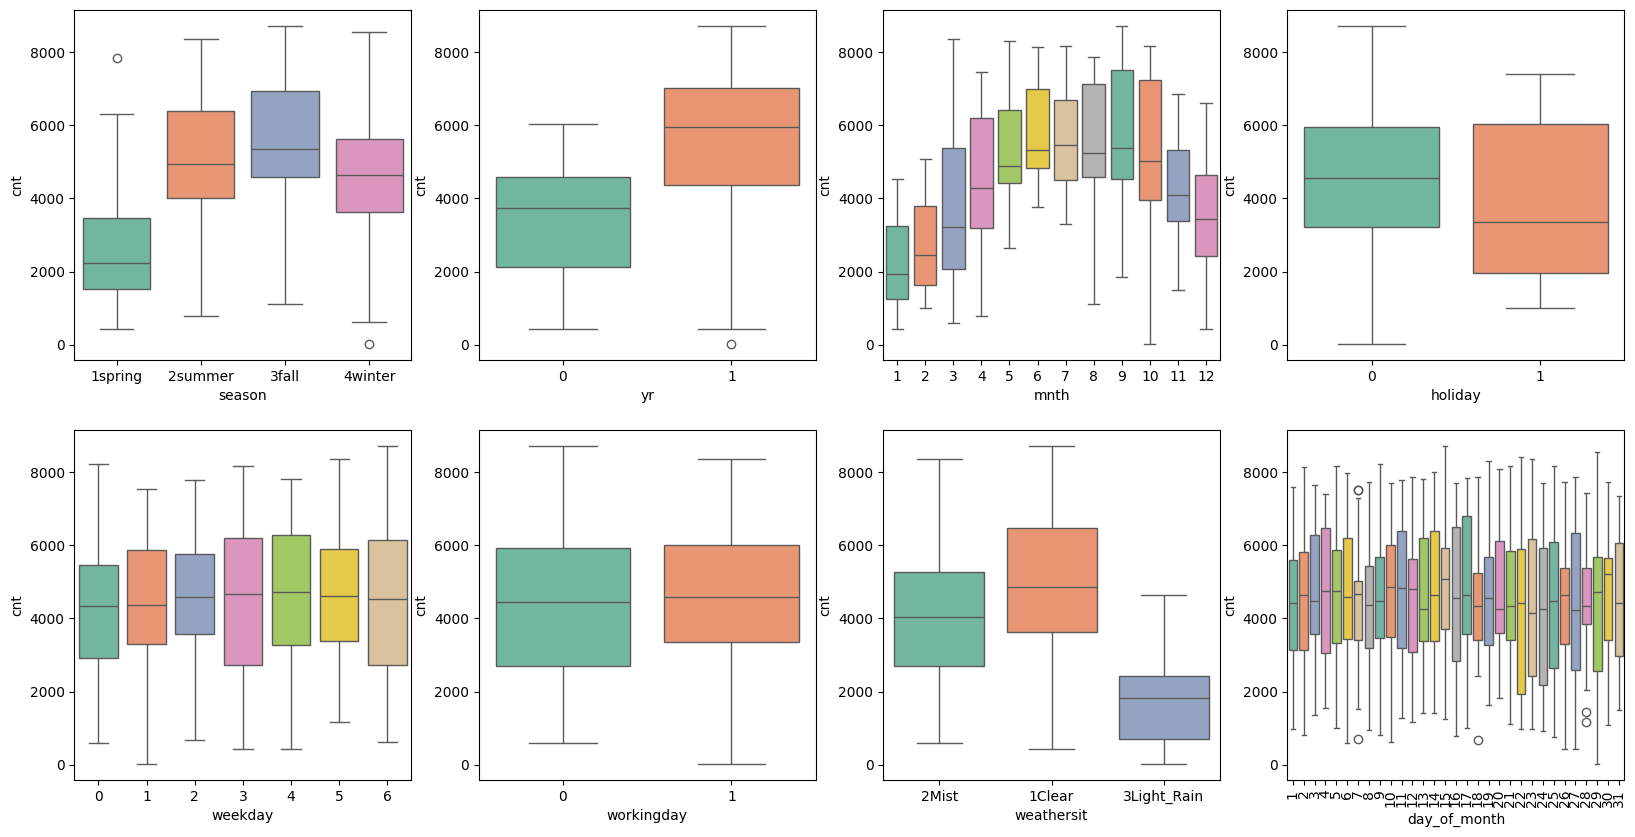

In [ ]:
# create box plot for categorical variables
# <<<< INFERENCE >>>>
# A. Median bike count in Summer and Fall is high
# B. Median bike count in year 1 is higher than year 0
# C. Mediam bike count in 4 to 10 months is higher (will co-relate to seaons also)
# D. Median bike count on a holiday (1) is lower than a non-holiday (0)
# E. Median bike count are lower when it is raining
# F. No major outliers in the data visible


int = 0
plot_colmn = 4
plot_rows = math.ceil(len(list_cat)/plot_colmn)

plt.figure(figsize=(plot_colmn*5, plot_rows*5))


for i in list_cat:
  int += 1
  plt.subplot(plot_rows,plot_colmn,int)
  sns.boxplot(x=i, y='cnt', data=bike, palette= 'Set2')
  if i == 'day_of_month':
    plt.xticks(rotation=90)


plt.show()

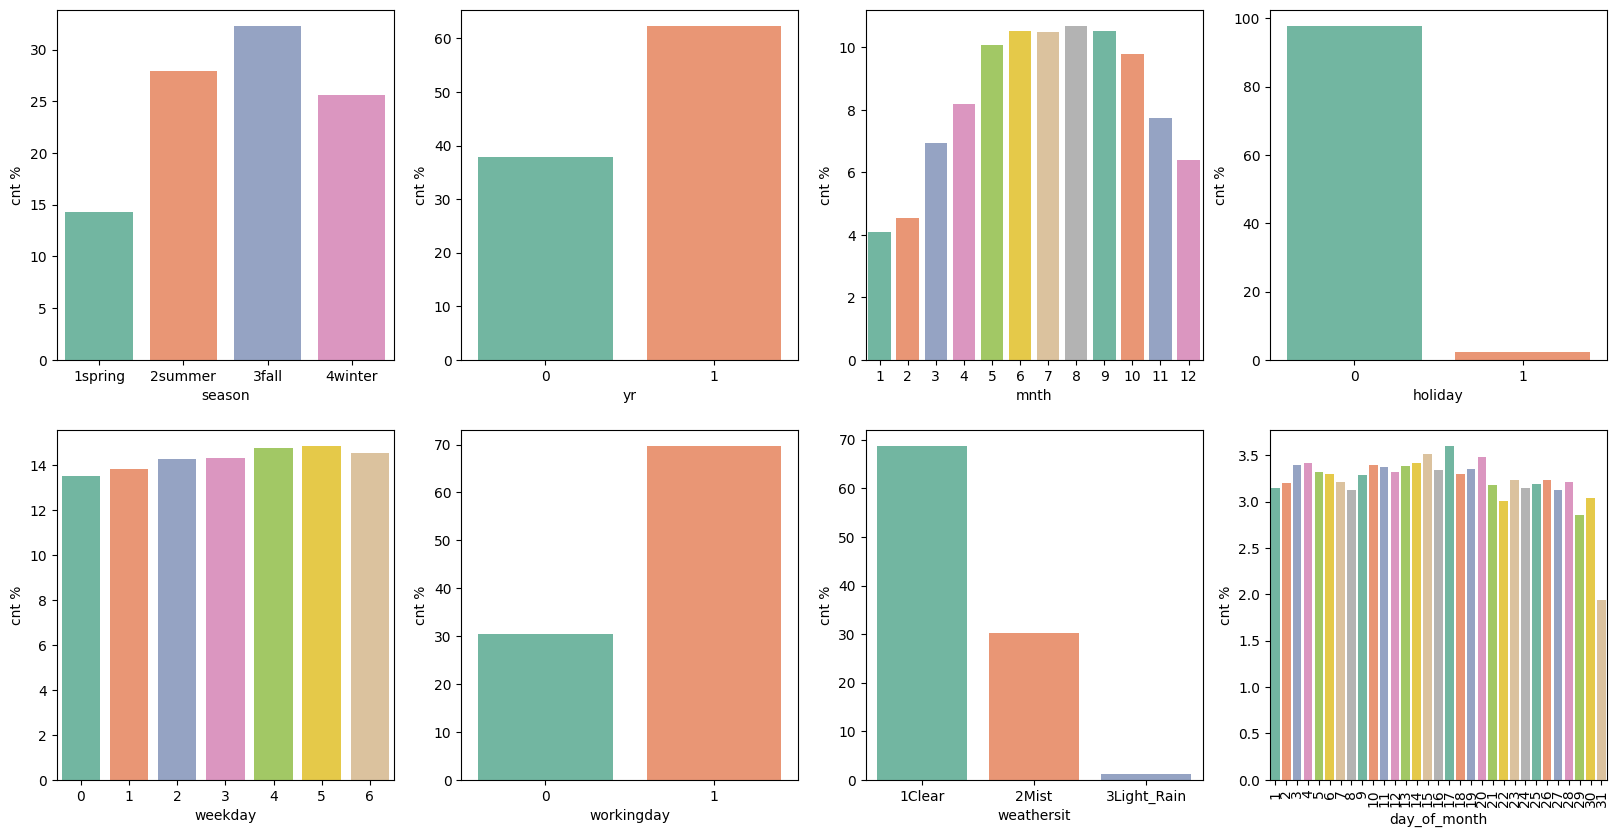

In [ ]:
# create bar plot for categorical variables for total bike count (cnt)
# <<<< INFERENCE >>>>
# A. % bike count are higher in Summer and Fall
# B. % bike count are higher in year 1 than year 0
# C. % bike count are higher in 2 to 12 months is higher (lower in month 1 and 2)
# D. % bike count are higher on a working day
# E. % bike count are highest on clear day, while lowest for when it is raining
# F. % bike count drop in the last part of the month


int = 0
plot_colmn = 4
plot_rows = math.ceil(len(list_cat)/plot_colmn)

plt.figure(figsize=(plot_colmn*5, plot_rows*5))

total_cnt = bike['cnt'].sum()

for i in list_cat:
  int += 1
  plt.subplot(plot_rows,plot_colmn,int)
  tmp_df = bike.groupby(i)['cnt'].sum().reset_index()
  tmp_df.rename(columns={'cnt':'cnt %'}, inplace=True)
  tmp_df['cnt %'] = tmp_df['cnt %']/total_cnt * 100
  sns.barplot(y='cnt %', x=i, data=tmp_df, palette= 'Set2')
  if i == 'day_of_month':
    plt.xticks(rotation=90)


plt.show()

### 5.2.B Creation of new variables based on Categorical Analysis and Outlier Removal

In [ ]:
# since initial days of the months are having higher ride, we would create a new
#  variable for first half of month (1) and last half of the month (0)

bike['first_half_of_month'] = np.where(bike['day_of_month'] <= 15, 1, 0)

In [ ]:
# monthly bike count are rising significantly in the months 2-10
# hence using this logic: when mnth is 1 or 2 create a new column in bike with
# name month1-2, when it is 3 or 4, then the month3-4 and so on
# not creating the last 2 months, to avoid co-linearity


bike['month1_2'] = np.where(bike['mnth'].isin([1, 2]), 1, 0)
bike['month3_4'] = np.where(bike['mnth'].isin([3, 4]), 1, 0)
bike['month5_6'] = np.where(bike['mnth'].isin([5, 6]), 1, 0)
bike['month7_8'] = np.where(bike['mnth'].isin([7, 8]), 1, 0)
bike['month9_10'] = np.where(bike['mnth'].isin([9, 10]), 1, 0)

In [ ]:
# creating hum_70 as till 70 bike count rises and after 70 hum bike count fall
# as reflected in the bin analysis. Beyond 70, bike count has a -ve correlation
bike['hum_70'] = np.where(bike['hum'] < 70, 1, 0)

In [ ]:
# creating windspeed_12 as till 12 windspeed, bike count rises and after 12 bike
# count fall as reflected in the bin analysis. Beyond 12 windspeed, bike count
# has a -ve correlation
bike['windspeed_12'] = np.where(bike['windspeed'] < 12, 1, 0)

In [ ]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_2summer', 'season_3fall', 'season_4winter', 'weathersit_2Mist',
       'weathersit_3Light_Rain', 'day_of_month', 'hum_bin', 'temp_bin',
       'windspeed_bin', 'tempxwind', 'tempxhum', 'first_half_of_month',
       'month1_2', 'month3_4', 'month5_6', 'month7_8', 'month9_10', 'hum_70',
       'windspeed_12'],
      dtype='object')

In [ ]:
# Find the upper bound for outliers in '1spring' and removing the same
Q1 = bike[bike['season'] == '1spring']['cnt'].quantile(0.25)
Q3 = bike[bike['season'] == '1spring']['cnt'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
bike = bike[~((bike['season'] == '1spring') & (bike['cnt'] > upper_bound))]

In [ ]:
# drop the row with the value of cnt below 100, this is too much of outlier

bike = bike[bike['cnt'] >= 100]


### 5.3 Correlation Analysis

In [ ]:
# get the co-relation between numeric data
bike_num_dummy = bike.drop(list_cat, axis=1)

bike_corr = bike_num_dummy.corr(numeric_only=True)

In [ ]:
# get highest co-relation with cnt (Values which are higher than .15 and lower than -0.15)
high_corr = bike_corr[(bike_corr['cnt'] > 0.15) | (bike_corr['cnt'] < -0.15)]

# remove columns instant before plotting, as this is just a index
high_corr = high_corr.drop(['instant'])

In [ ]:
print(high_corr.index)

Index(['temp', 'atemp', 'windspeed', 'cnt', 'season_3fall', 'weathersit_2Mist',
       'weathersit_3Light_Rain', 'tempxwind', 'tempxhum', 'month1_2',
       'month5_6', 'month7_8', 'month9_10', 'hum_70', 'windspeed_12'],
      dtype='object')


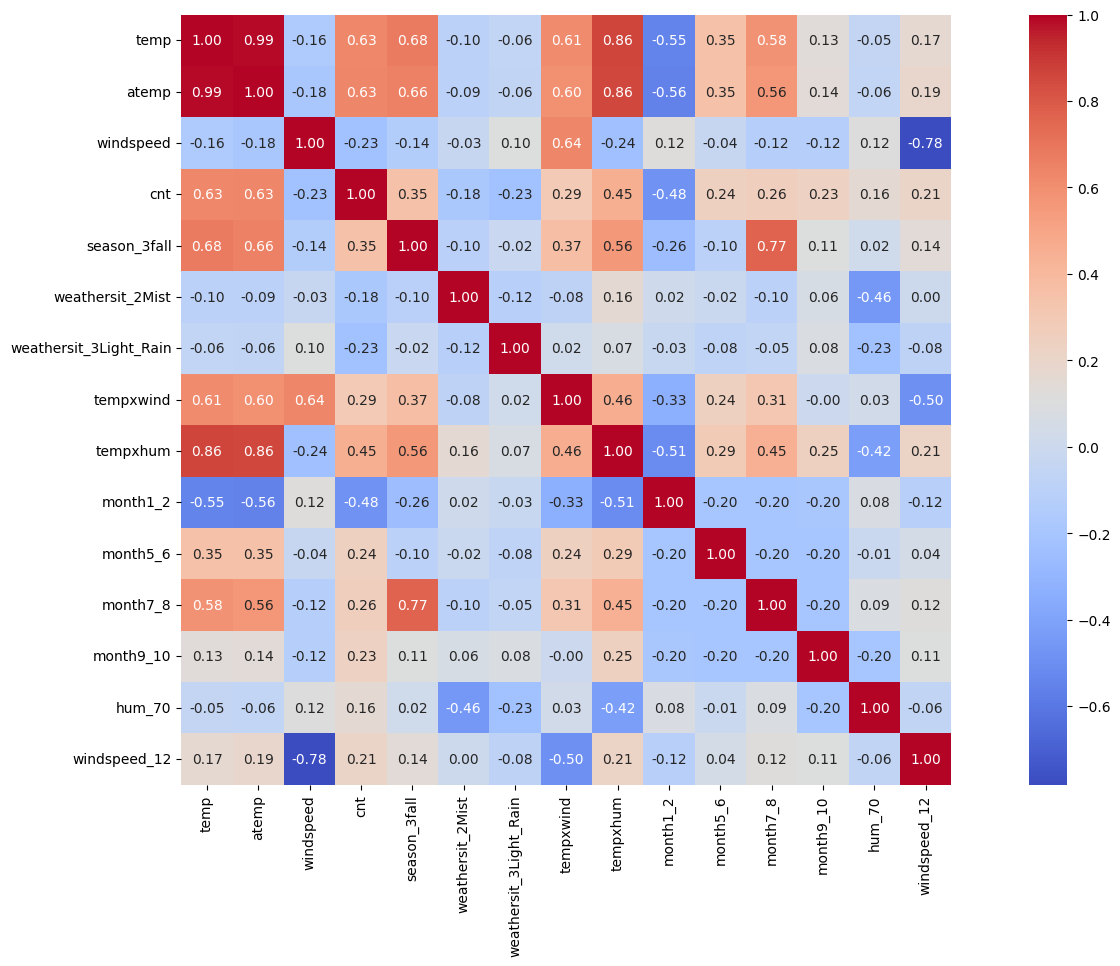

In [ ]:
# plot highest co-relation variable for cnt
# <<<< INFERENCE >>>>
# these fields have the highest dependency 'temp', 'atemp', 'windspeed',
# 'season_3fall', 'weathersit_2Mist', 'weathersit_3Light_Rain', 'tempxwind',
# 'tempxhum', 'month1_2', 'month5_6', 'month7_8', 'month9_10'
# B. temp and atemp have high corelation, one of them can be dropped

plt.figure(figsize=(20, 10))
sns.heatmap(bike[high_corr.index].corr(), annot=True, cmap='coolwarm', fmt='.2f', square = True)
plt.show()

# 6. Model Building and Evaluation

## 6.1 Train-Test Split and feature scaling

In [ ]:
# creating a copy of bike so that original df can be accessed easily
bike_model = bike.copy()

# dropping dteday, instant and as these are dates and original index
# also dropping casual, registered as these are related data
# dropping other categorical data also as dummies have been created for them
bike_model.drop(['instant', 'dteday', 'hum_bin',
                 'temp_bin', 'windspeed_bin', 'season', 'weathersit',
                 'day_of_month', 'weekday'], axis=1, inplace=True)


In [ ]:
# split data into train and test
np.random.seed(0)
df_train, df_test = train_test_split(bike_model, train_size=0.7, test_size=0.3,
                                     random_state=100)

In [ ]:
# scaling numercial data
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'tempxwind', 'tempxhum', 'cnt']
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
# Dividing data into X and y variables

y_train = df_train['cnt']
X_train = df_train.drop('cnt', axis=1)

# shape of X_train and y_train
X_train.shape, y_train.shape

((509, 23), (509,))

## 6.2 Creating the Model

### 6.2a Defining the model summary function and VIF functions

In [ ]:
# This function is used to build the model and display the summary of the model
def build_model(X, y):
    X = sm.add_constant(X) # Adding a constant
    lm = sm.OLS(y, X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

# This function is used to check the VIF values of the features
def checkVIF(X): # Function to check VIF
    vif = pd.DataFrame() # Create a dataframe to store the VIF values
    vif['Features'] = X.columns # Store the column names in the dataframe i.e. the feature names
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Calculate the VIF values for each feature
    vif['VIF'] = round(vif['VIF'], 2) # Round off the VIF values to 2 decimal places
    vif = vif.sort_values(by = "VIF", ascending = False) # Sort the VIF values in descending order
    return(vif)

### 6.2b Model 0 (Creating v0 Draft Model without feature reduction or elimination)

In [ ]:
# Getting statistical and VIF details for Model
# this has too many variables with p>0.05 and also very high VIFs > 5
X_train_new0 = build_model(X_train, y_train)
checkVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.19e-185
Time:                        13:06:28   Log-Likelihood:                 501.89
No. Observations:                 509   AIC:                            -955.8
Df Residuals:                     485   BIC:                            -854.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
4,temp,1985.65
5,atemp,1886.28
14,tempxhum,230.78
6,hum,192.52
1,mnth,89.47
13,tempxwind,75.82
7,windspeed,58.97
16,month1_2,23.38
17,month3_4,18.25
18,month5_6,15.57


## 6.3 Reverse Factor Elimination

In [ ]:
# running RFE to get the best factors to start with

# define the LM model
lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

X_train_rfe_list = X_train.loc[:, rfe.support_].columns
print(X_train_rfe_list)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2summer',
       'season_3fall', 'season_4winter', 'weathersit_2Mist',
       'weathersit_3Light_Rain', 'month1_2', 'month5_6', 'month9_10',
       'hum_70'],
      dtype='object')


In [ ]:
# finding variables which are in high_corr matrix and not in X_train_rfe_list
cols_in_high_corr_not_in_rfe = [col for col in high_corr.index
                                if col not in X_train_rfe_list]

print(cols_in_high_corr_not_in_rfe)

['cnt', 'tempxwind', 'tempxhum', 'month7_8', 'windspeed_12']


In [ ]:
# these RFE fields are inline with the fields from above visual and co-relation
# # these fields have the highest dependency from correlation matrix
# 'temp', 'atemp', 'windspeed', 'season_3fall', 'weathersit_2Mist',
# 'weathersit_3Light_Rain', 'tempxwind', 'tempxhum', 'month1_2', 'month5_6',
# 'month7_8', 'month9_10', 'hum_70', 'windspeed_12'], dtype='object'

# adding 'tempxhum' as this RFE list manually, as tempxhum has a high +ve
# correlation to cnf (0.45)

if 'tempxhum' not in X_train_rfe_list:
  X_train_rfe_list = list(X_train_rfe_list) + ['tempxhum']



In [ ]:
# get the X_train with the list of columns

X_train_rfe = X_train[X_train_rfe_list]

## 6.4 Testing various Models with list of columns and Model Selection

### Model 1

In [ ]:
# Getting statistical and VIF details for Model 1
X_train_new1 = build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.01e-191
Time:                        13:08:53   Log-Likelihood:                 498.08
No. Observations:                 509   AIC:                            -962.2
Df Residuals:                     492   BIC:                            -890.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,temp,1625.05
3,atemp,1395.48
15,tempxhum,133.89
4,hum,47.73
7,season_3fall,7.96
14,hum_70,6.77
5,windspeed,5.59
6,season_2summer,4.91
8,season_4winter,4.50
11,month1_2,2.92


In [ ]:
# since tempxhum has high p value > 0.05

X_train_new2 = X_train_new1.drop(['tempxhum'], axis=1)

### Model 2

In [ ]:
# Getting statistical and VIF details for Model 2
X_train_new2 = build_model(X_train_new2, y_train)
checkVIF(X_train_new2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     188.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.36e-193
Time:                        13:09:47   Log-Likelihood:                 498.05
No. Observations:                 509   AIC:                            -964.1
Df Residuals:                     493   BIC:                            -896.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
3,temp,213.01
4,atemp,202.45
0,const,119.48
8,season_3fall,5.89
7,season_2summer,3.84
9,season_4winter,3.42
5,hum,3.31
15,hum_70,2.72
12,month1_2,2.66
13,month5_6,2.04


In [ ]:
# since tempxhum has high p > 0.05 and high VIF > 5 dropping the same
X_train_new3 = X_train_new2.drop(['temp'], axis=1)

### Model 3

In [ ]:
# Getting statistical and VIF details for Model 3
X_train_new3 = build_model(X_train_new3, y_train)
checkVIF(X_train_new3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          5.87e-194
Time:                        13:10:08   Log-Likelihood:                 497.90
No. Observations:                 509   AIC:                            -965.8
Df Residuals:                     494   BIC:                            -902.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
0,const,119.25
7,season_3fall,5.45
3,atemp,4.22
6,season_2summer,3.84
8,season_4winter,3.42
4,hum,3.31
14,hum_70,2.72
11,month1_2,2.66
12,month5_6,1.95
9,weathersit_2Mist,1.71


In [ ]:
# since month1_2 has high p > 0.05 and dropping the same
X_train_new4 = X_train_new3.drop(['month1_2'], axis=1)

### Model 4

In [ ]:
# Getting statistical and VIF details for Model 4
X_train_new4 = build_model(X_train_new4, y_train)
checkVIF(X_train_new4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.14e-194
Time:                        13:10:30   Log-Likelihood:                 496.15
No. Observations:                 509   AIC:                            -964.3
Df Residuals:                     495   BIC:                            -905.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
0,const,103.63
7,season_3fall,4.83
3,atemp,3.91
4,hum,3.31
6,season_2summer,2.78
13,hum_70,2.72
8,season_4winter,2.13
11,month5_6,1.93
9,weathersit_2Mist,1.71
12,month9_10,1.36


In [ ]:
# dropping month5_6 has high p > 0.05 and dropping the same
X_train_new5 = X_train_new4.drop(['month5_6'], axis=1)

### Model 5

In [ ]:
# Getting details for Model 5
X_train_new5 = build_model(X_train_new5, y_train)
checkVIF(X_train_new5)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     232.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          5.61e-195
Time:                        13:10:38   Log-Likelihood:                 494.69
No. Observations:                 509   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -908.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
0,const,102.86
7,season_3fall,4.58
3,atemp,3.41
4,hum,3.30
12,hum_70,2.72
6,season_2summer,2.55
8,season_4winter,2.10
9,weathersit_2Mist,1.71
11,month9_10,1.34
10,weathersit_3Light_Rain,1.26


In [ ]:
# dropping season_3fall due to high VIF (close to 5)
X_train_new6 = X_train_new5.drop(['season_3fall'], axis=1)

### Model 6 (Final)

In [ ]:
# Getting details for Model 6
X_train_new6 = build_model(X_train_new6, y_train)
checkVIF(X_train_new6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          4.23e-191
Time:                        13:10:47   Log-Likelihood:                 482.65
No. Observations:                 509   AIC:                            -941.3
Df Residuals:                     497   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
0,const,102.64
4,hum,3.29
11,hum_70,2.72
8,weathersit_2Mist,1.70
7,season_4winter,1.41
3,atemp,1.33
10,month9_10,1.33
9,weathersit_3Light_Rain,1.25
6,season_2summer,1.20
5,windspeed,1.17


### Residual Analysis of the train data

In [ ]:
# creating new model with final data
lm = sm.OLS(y_train,X_train_new6).fit()

# predidcted cnt
y_train_cnt = lm.predict(X_train_new6)

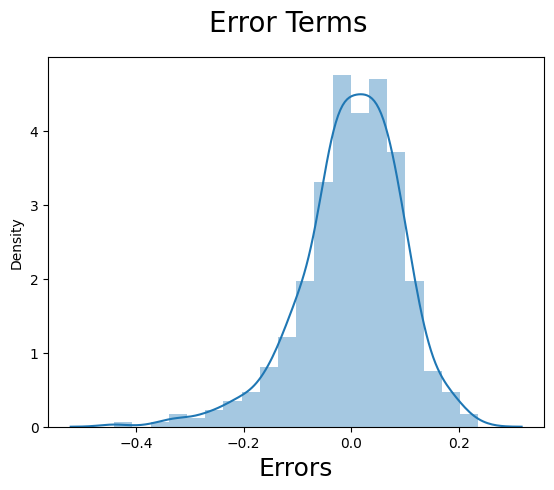

In [ ]:
# Plot the histogram of the error terms
# Inference - these are normally distributed
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## 6.5 Running on test data and making predictions

In [ ]:
# scaling test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
# Dividing df_test into X_test and y_test
y_test = df_test['cnt']
X_test = df_test.drop('cnt', axis=1)

In [ ]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test)


In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_new6.columns]


In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)


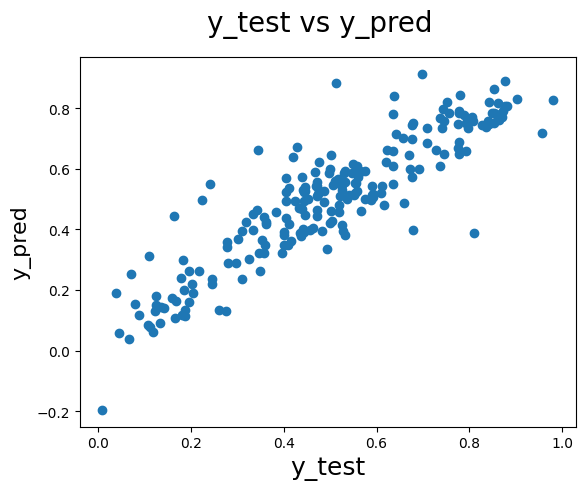

In [ ]:
# Plotting y_test and y_pred to understand the spread.
# Inference - the spread is scattered around a straight line
# The closer the points are to a straight line, the better is the predictions.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

## 6.6 Model Evaluation

In [ ]:
# Model Evaluation (R2 for test vs test_pred)
# <<<< Inference >>>>
# This 0.814 is pretty close to the train model of 0.839
r2_score(y_test, y_pred)

0.8044449044804097

# 7. Conclusion
Below are the coefficients of the various variables in the final model

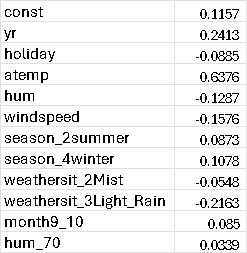

Below are the variables, which have the highest or lowest coefficients:
*   atemp (coefficient 0.6376) – temperature of the day in Celsius (on colder days below 8 Celsius the bike counts are low and with rising temp, the bike counts rises)

*   yr (coefficient 0.2413) – year, which is 1 for 2019 and 0 for 2018 (since bike counts in year 1 is higher)
*   weathersit_3Light_Rain (coefficient -0.2163) – Derived dummy variable, which reflected the day with “Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds” or a value of 3 for “weathersit”. This is negative, as on such days, the bike counts is low.


Overall, the model is having:
R2 of 80% on Test data and R2 of 84% on Train data (it is able to capture > 80% of variance).


# 8. Appendix

In [ ]:
# Calculate Pearson correlation between y_test and y_pred
pearson_corr = stats.pearsonr(y_test, y_pred)
print("Pearson Correlation:", pearson_corr)


Pearson Correlation: PearsonRResult(statistic=0.8979720609534714, pvalue=2.629910041886399e-79)


In [ ]:
pearson_corr = stats.pearsonr(bike['temp'], bike['atemp'])
print("Pearson Correlation:", pearson_corr)

Pearson Correlation: PearsonRResult(statistic=0.9917055345792295, pvalue=0.0)


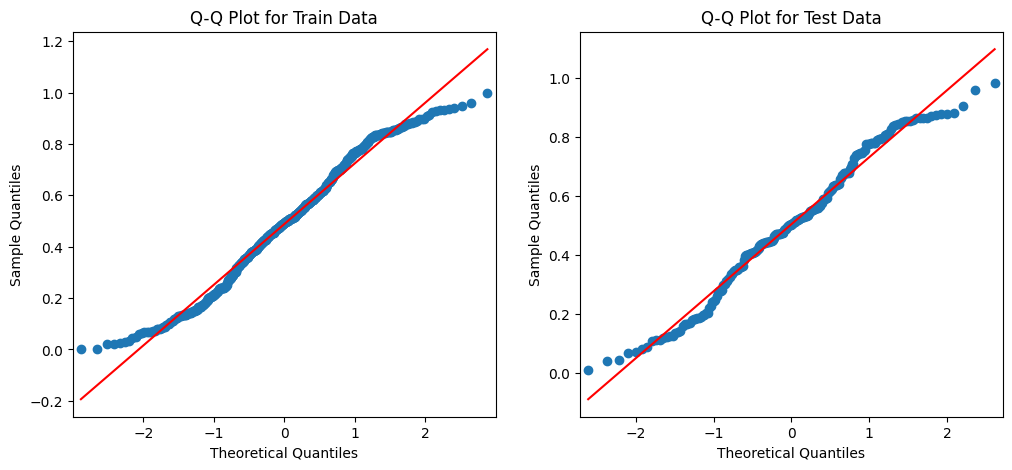

In [ ]:
# Generate Q-Q plots for train and test data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.qqplot(df_train['cnt'], line='r', ax=axes[0])
axes[0].set_title('Q-Q Plot for Train Data')
sm.qqplot(df_test['cnt'], line='r', ax=axes[1])
axes[1].set_title('Q-Q Plot for Test Data')
plt.show()

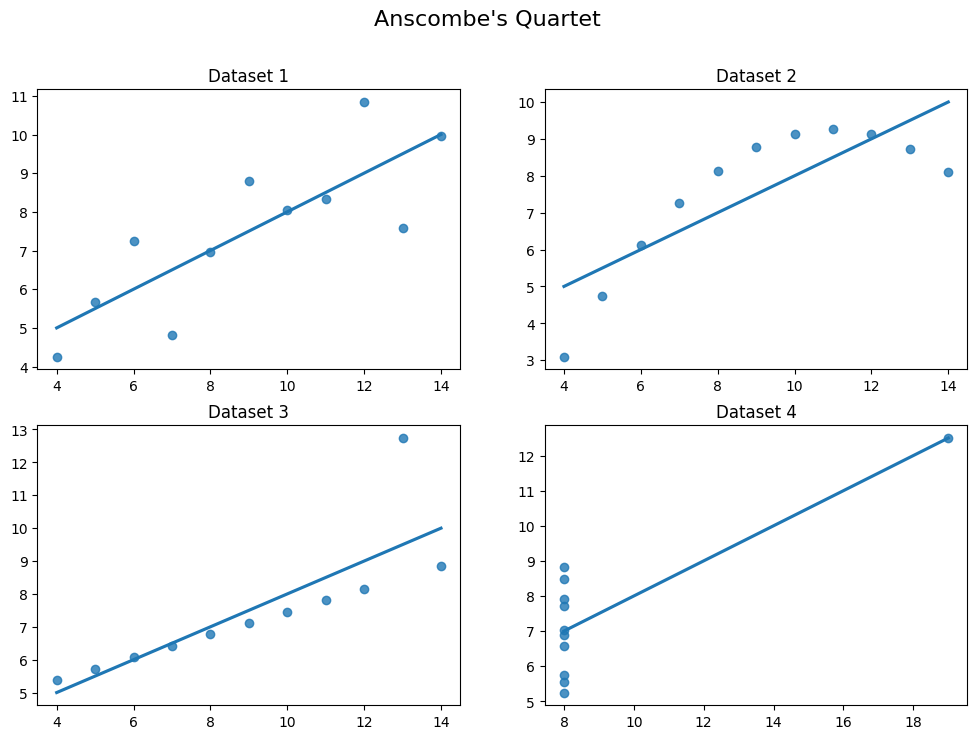

In [ ]:
# Anscombe's quartet data
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

plt.figure(figsize=(12, 8))
# Create subplots
plt.subplot(2, 2, 1)
sns.regplot(x=x1, y=y1, ci=0)
plt.title('Dataset 1')

plt.subplot(2, 2, 2)
sns.regplot(x=x2, y=y2, ci=0)
plt.title('Dataset 2')

plt.subplot(2, 2, 3)
sns.regplot(x=x3, y=y3, ci=0)
plt.title('Dataset 3')

plt.subplot(2, 2, 4)
sns.regplot(x=x4, y=y4, ci=0)
plt.title('Dataset 4')

# Set titles
plt.suptitle('Anscombe\'s Quartet', fontsize=16)
plt.show()


plt.show()
